In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WorldCupMatches.csv")

In [5]:
df.head()

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   
3                     2549.0                   1.0                   0.0   
4                    23409.0                   0.0                   0.0   

                  Referee               Assistant 1  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2  RoundID  MatchID Home Team Initials  \
0         REGO Gilberto (BRA)    201.0   1096.0                FRA   
1       WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2         BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3    MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4  RADULESCU Constantin (ROU)    201.0   1085.0                ARG   

  Away Team Initials  
0                MEX  
1                BEL  
2                BRA  
3                PER  
4                FRA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [9]:
df.describe()

Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000              0.000000  2.010000e+02  2.500000e+01  
25%                0.000000              0.000000  2.620000e+02  1.188750e+03  
50%                0.000000              0.000000  3.370000e+02  2.191000e+03  
75%                1.000000              1.000000  2.497220e+05  4.395006e+07  
max                6.000000              5.000000  9.741060e+07  3.001865e+08

In [11]:
#bar chart
# Count matches per year
matches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(matches_per_year.index, matches_per_year.values)
plt.title("Number of World Cup Matches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#line chart
# Calculate total goals per match (Home + Away)
df['TotalGoals'] = df['Home Team Goals'] + df['Away Team Goals']

goals_per_year = df.groupby("Year")['TotalGoals'].mean()
plt.figure(figsize=(10,5))
plt.plot(goals_per_year.index, goals_per_year.values)
plt.title("Average Goals per Match by Year")
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#pie chart
# Determine outcomes
df['Outcome'] = df.apply(
    lambda row: 'Home Win' if row['Home Team Goals'] > row['Away Team Goals'] 
    else ('Away Win' if row['Away Team Goals'] > row['Home Team Goals'] 
    else 'Draw'),
    axis=1
)
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct="%1.1f%%")
plt.title("Match Outcomes Distribution")
plt.show()

In [17]:
df2 = df.copy()

In [19]:
# Common goal column names in this dataset:
# "Home Team Goals", "Away Team Goals" — if different, adapt below
home_goal_col = None
away_goal_col = None
for c in df2.columns:
    if 'home' in c.lower() and 'goal' in c.lower():
        home_goal_col = c
    if 'away' in c.lower() and 'goal' in c.lower():
        away_goal_col = c

In [21]:
# Create numeric goal columns
if home_goal_col and away_goal_col:
    df2['home_goals'] = pd.to_numeric(df2[home_goal_col], errors='coerce')
    df2['away_goals'] = pd.to_numeric(df2[away_goal_col], errors='coerce')
else:
    # fallback: try columns named 'Home Team Goals' / 'Away Team Goals' explicitly
    for try_name in ['Home Team Goals', 'Away Team Goals']:
        if try_name in df2.columns and 'home_goals' not in df2.columns:
            df2['home_goals'] = pd.to_numeric(df2['Home Team Goals'], errors='coerce')
        if try_name in df2.columns and 'away_goals' not in df2.columns:
            df2['away_goals'] = pd.to_numeric(df2['Away Team Goals'], errors='coerce')

In [23]:
# Derived numeric fields
df2['total_goals'] = df2[['home_goals','away_goals']].sum(axis=1)
df2['goal_diff'] = df2['home_goals'] - df2['away_goals']

In [25]:
# Attendance conversion (if present)
attendance_col = next((c for c in df2.columns if 'attend' in c.lower()), None)
if attendance_col:
    df2['attendance'] = pd.to_numeric(df2[attendance_col].astype(str).str.replace(',',''), errors='coerce')

In [27]:
# Year column (some WorldCup datasets have 'Year')
if 'Year' in df2.columns:
    df2['year'] = pd.to_numeric(df2['Year'], errors='coerce')
else:
    # try to find a date-like column
    date_col = next((c for c in df2.columns if 'date' in c.lower()), None)
    if date_col:
        df2[date_col] = pd.to_datetime(df2[date_col], errors='coerce')
        df2['year'] = df2[date_col].dt.year
    else:
        df2['year'] = np.nan

In [29]:
# Prepare result category column
def _result(r):
    h, a = r.get('home_goals'), r.get('away_goals')
    if pd.isna(h) or pd.isna(a):
        return np.nan
    if h > a:
        return 'Home Win'
    elif h < a:
        return 'Away Win'
    else:
        return 'Draw'

df2['result'] = df2.apply(_result, axis=1)

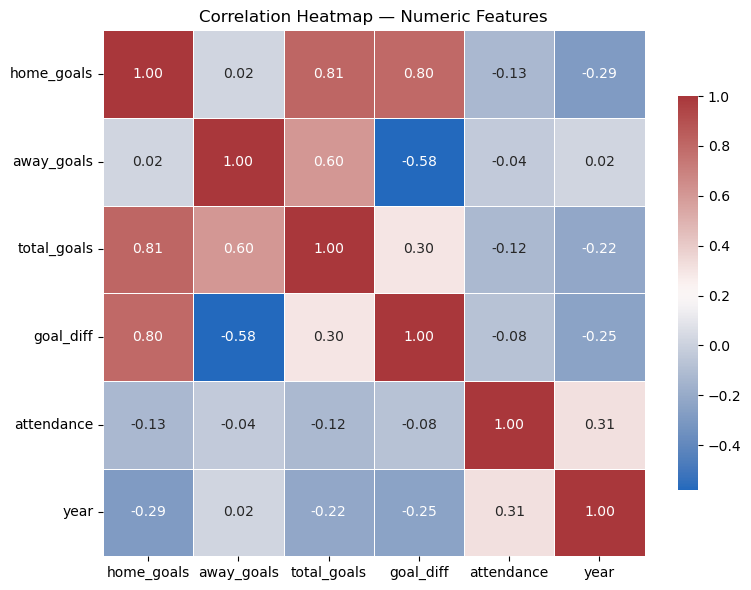

In [31]:
# Select numeric columns that are meaningful for correlation
numeric_candidates = ['home_goals', 'away_goals', 'total_goals', 'goal_diff', 'attendance', 'year']
num_cols = [c for c in numeric_candidates if c in df2.columns]

if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    corr = df2[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', linewidths=.5, cbar_kws={"shrink": .75})
    plt.title("Correlation Heatmap — Numeric Features")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns found for a heatmap. Detected:", num_cols)

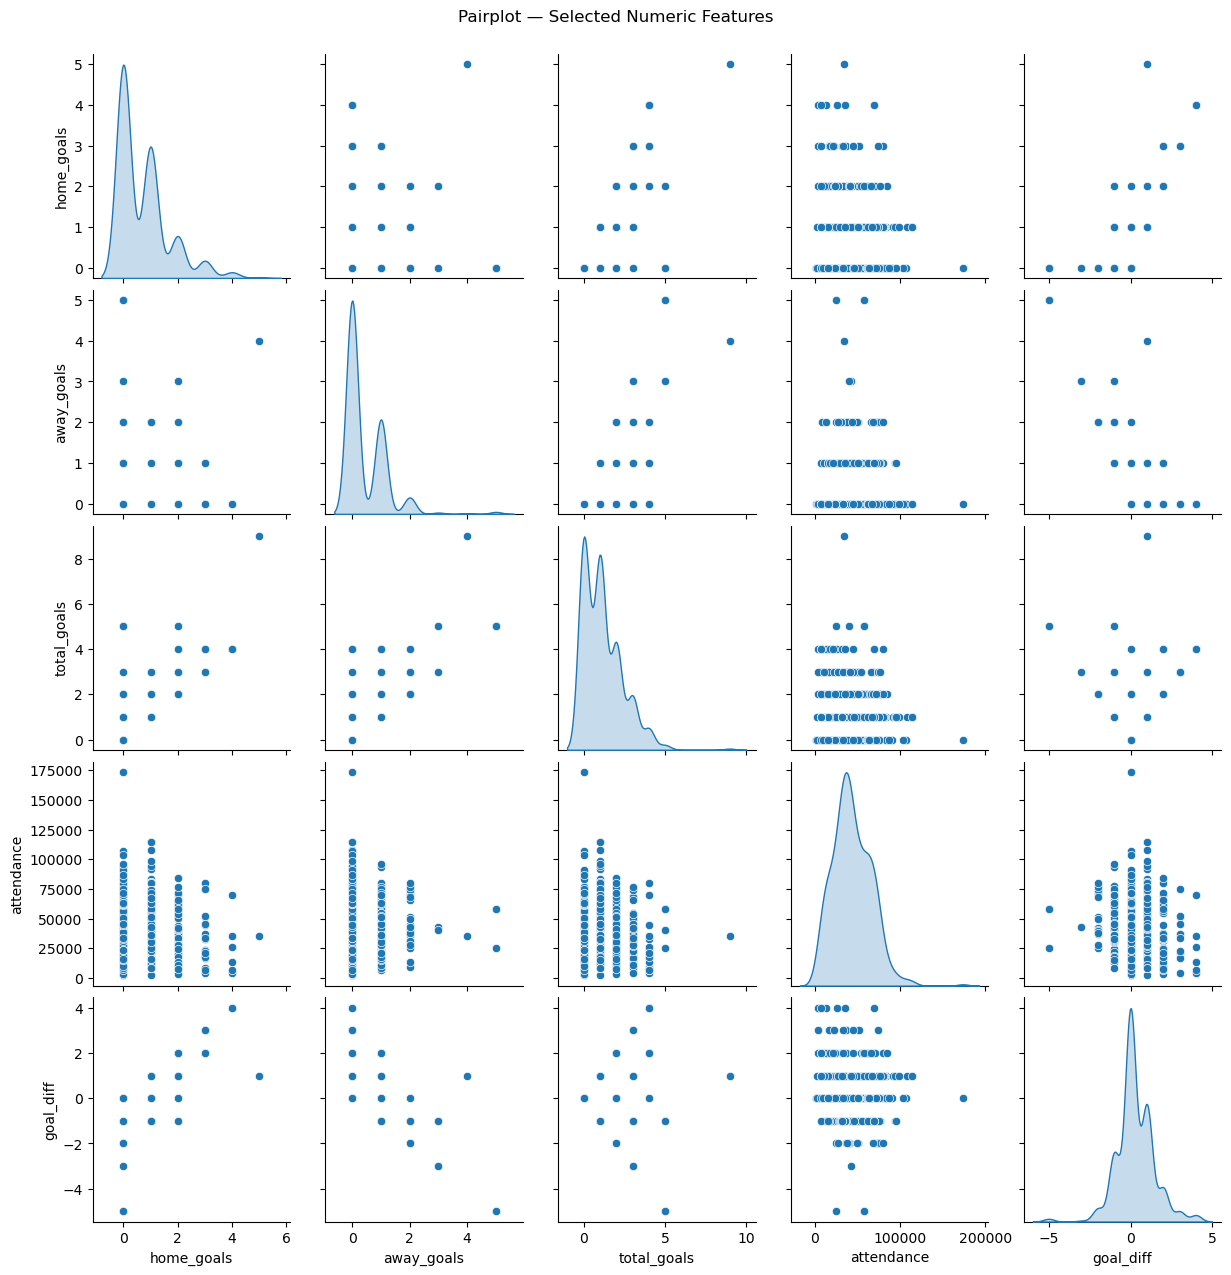

In [33]:
# Choose columns for pairplot (avoid huge plots, sample if necessary)
pair_cols = [c for c in ['home_goals', 'away_goals', 'total_goals', 'attendance', 'goal_diff'] if c in df2.columns]
if len(pair_cols) >= 2:
    # sample to keep pairplot manageable
    sample_df = df2[pair_cols].dropna().sample(n=min(500, len(df2)), random_state=1)
    sns.pairplot(sample_df, diag_kind='kde', corner=False)
    plt.suptitle("Pairplot — Selected Numeric Features", y=1.02)
    plt.show()
else:
    print("Pairplot skipped — insufficient numeric columns:", pair_cols)

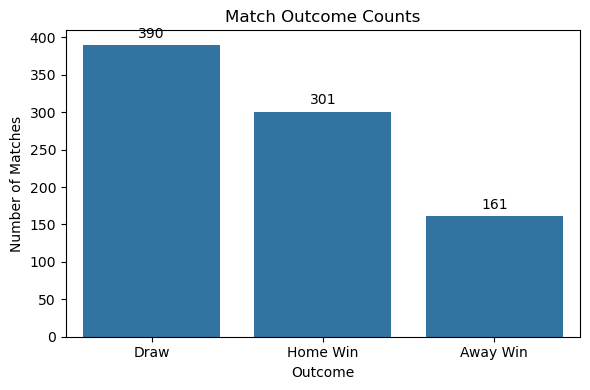

In [35]:
# Example 1: Countplot for match result (Home Win / Away Win / Draw)
if 'result' in df2.columns:
    plt.figure(figsize=(6,4))
    order = df2['result'].value_counts().index
    ax = sns.countplot(data=df2, x='result', order=order)
    plt.title("Match Outcome Counts")
    plt.xlabel("Outcome")
    plt.ylabel("Number of Matches")
    # add value labels on bars
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ','), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
    plt.tight_layout()
    plt.show()
else:
    print("No 'result' column found for countplot.")